In [35]:
# Install required packages
!pip install matplotlib seaborn scikit-learn pandas numpy scipy

# Import required libraries for flood risk analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Set display options
pd.set_option('display.max_columns', None)

# Set plot style - using a built-in style instead of seaborn
plt.style.use('default')  # or try 'classic', 'bmh', 'ggplot'

# Set seaborn style separately
sns.set_theme()  # This is the correct way to set seaborn styling

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\bobby\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
# Load the flood risk dataset
df = pd.read_csv('flood_kaggle.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print("-" * 50)
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print("\nFeatures in dataset:")
for col in df.columns:
    print(f"- {col}")

Dataset Overview:
--------------------------------------------------
Number of records: 50000
Number of features: 21

Features in dataset:
- MonsoonIntensity
- TopographyDrainage
- RiverManagement
- Deforestation
- Urbanization
- ClimateChange
- DamsQuality
- Siltation
- AgriculturalPractices
- Encroachments
- IneffectiveDisasterPreparedness
- DrainageSystems
- CoastalVulnerability
- Landslides
- Watersheds
- DeterioratingInfrastructure
- PopulationScore
- WetlandLoss
- InadequatePlanning
- PoliticalFactors
- FloodProbability


In [37]:
# Display basic statistics of the dataset
print("Basic Statistics:")
print("-" * 50)
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print("-" * 50)
print(df.isnull().sum())

Basic Statistics:
--------------------------------------------------
       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159     

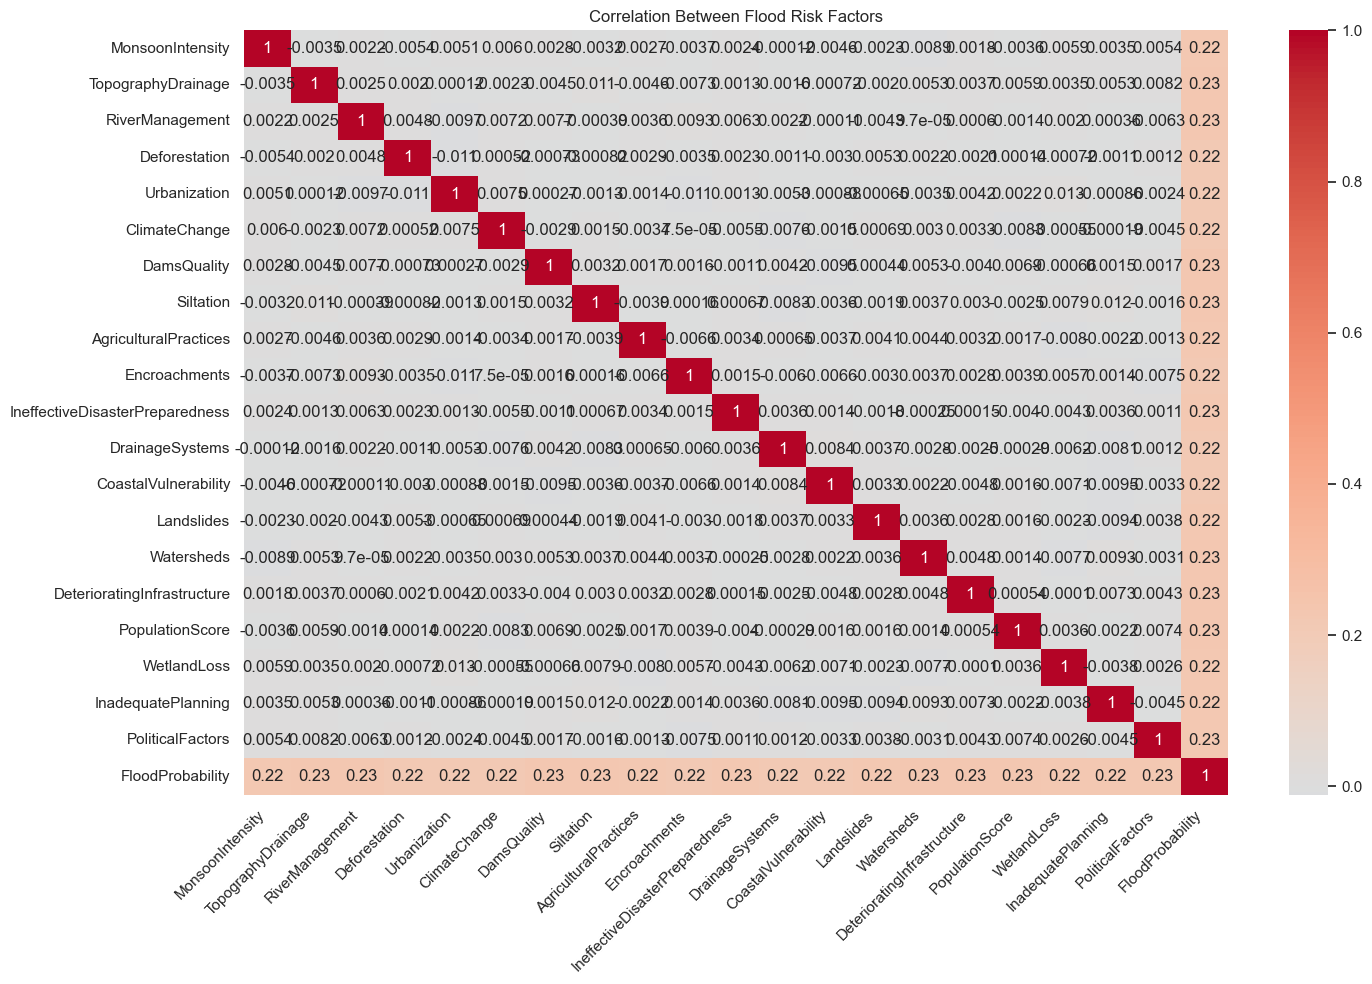

In [38]:
# Create a correlation matrix visualization
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Flood Risk Factors')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Technical Explanation: Visualizing feature correlations to identify relationships between flood factors
# Simple Explanation: Making a colorful map showing which flood causes tend to happen together
# NYC Application: Understanding how different flood factors in NYC interact with each other

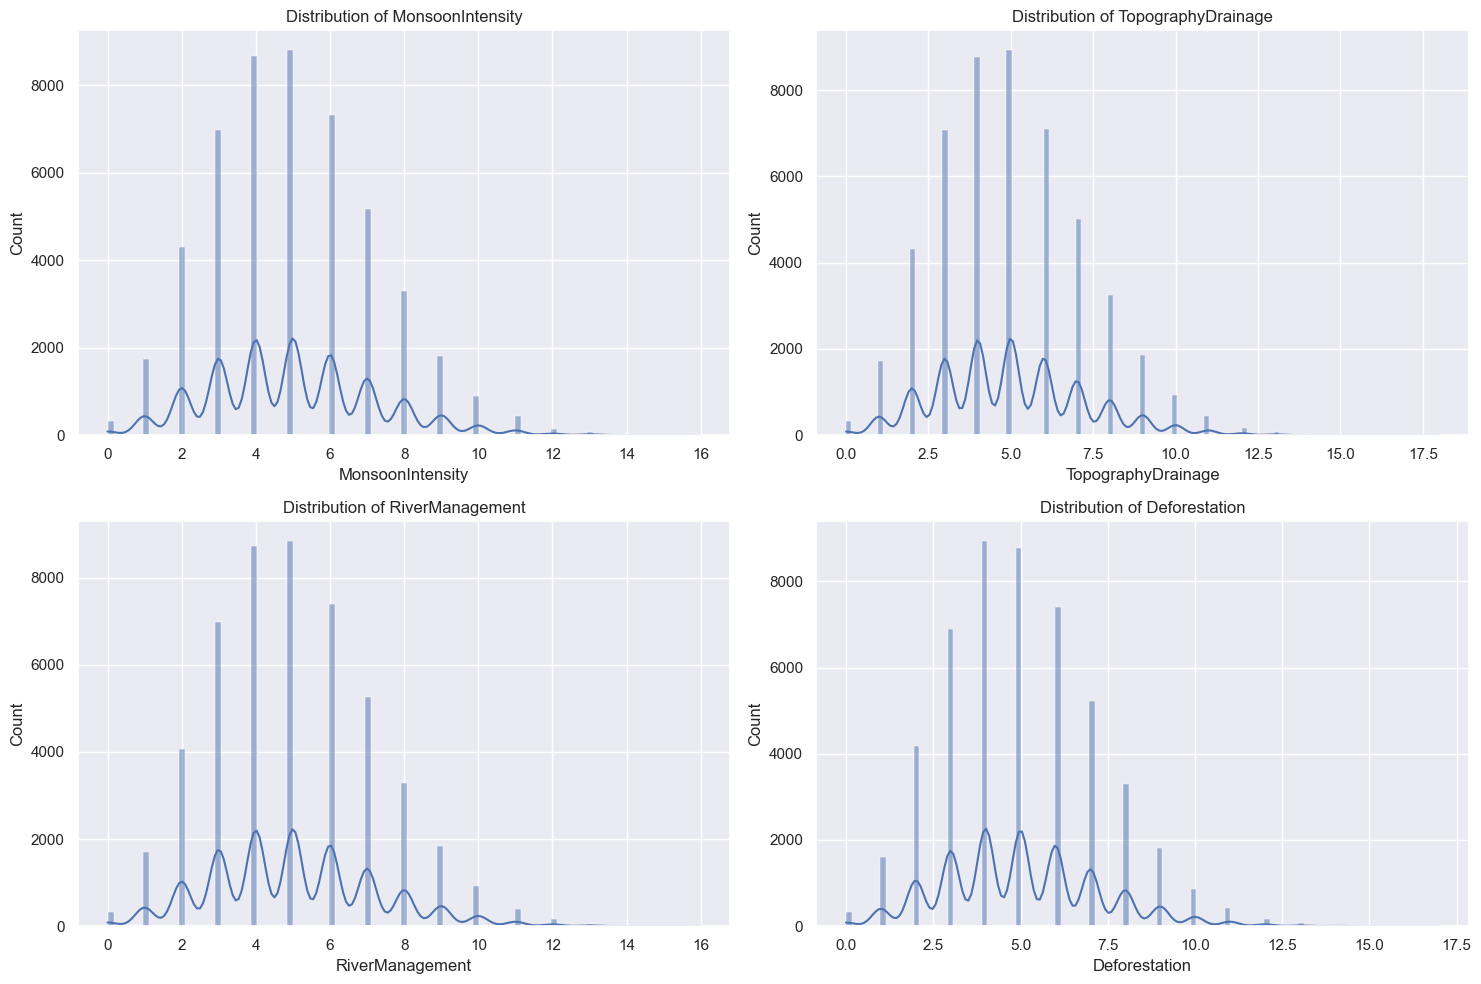

In [39]:
# Create distribution plots for key features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Technical: Analyzing probability distributions of flood risk factors
# Simple: Looking at how often different flood risks occur
# NYC Application: Understanding the typical ranges of flood factors in NYC areas

In [40]:
# Prepare data for analysis
# Step 1: Separate features and target
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Original data first few values:")
print(X.iloc[0])
print("\nScaled data first few values:")
print(X_scaled_df.iloc[0])

# Technical: Standardizing features to zero mean and unit variance
# Simple: Making sure all our measurements use the same scale
# NYC Application: Preparing flood data so we can compare different areas fairly

Original data first few values:
MonsoonIntensity                    3
TopographyDrainage                  8
RiverManagement                     6
Deforestation                       6
Urbanization                        4
ClimateChange                       4
DamsQuality                         6
Siltation                           2
AgriculturalPractices               3
Encroachments                       2
IneffectiveDisasterPreparedness     5
DrainageSystems                    10
CoastalVulnerability                7
Landslides                          4
Watersheds                          2
DeterioratingInfrastructure         3
PopulationScore                     4
WetlandLoss                         3
InadequatePlanning                  2
PoliticalFactors                    6
Name: 0, dtype: int64

Scaled data first few values:
MonsoonIntensity                  -0.890321
TopographyDrainage                 1.342509
RiverManagement                    0.441028
Deforestation          

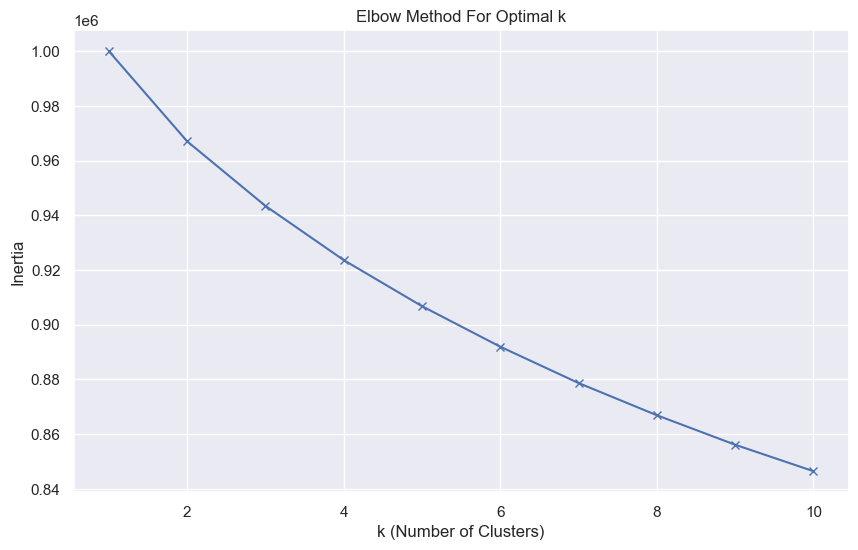

In [41]:
# Determine optimal number of clusters using elbow method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Technical: Finding optimal cluster count using within-cluster sum of squares
# Simple: Finding the best way to group similar flood areas together
# NYC Application: Identifying natural groupings of flood-prone areas

In [42]:
# Perform K-means clustering with optimal k
optimal_k = 3  # Based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Analyze cluster characteristics
cluster_stats = df.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_stats)

# Technical: Implementing partitional clustering to segment flood risk areas
# Simple: Grouping areas that have similar flood risks
# NYC Application: Creating flood risk zones for different NYC neighborhoods

Cluster Characteristics:
         MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
Cluster                                                                         
0                5.442542            4.783616         5.080282       4.816102   
1                4.734056            4.964926         4.998214       5.040314   
2                4.755401            5.233701         4.961695       5.193590   

         Urbanization  ClimateChange  DamsQuality  Siltation  \
Cluster                                                        
0            6.318814       5.327175     5.364520   5.012429   
1            4.121062       4.758173     4.685405   4.875603   
2            4.411234       4.850842     4.974141   5.083769   

         AgriculturalPractices  Encroachments  \
Cluster                                         
0                     5.071356       4.876667   
1                     5.014589       4.721610   
2                     4.922487       5.462823   

  

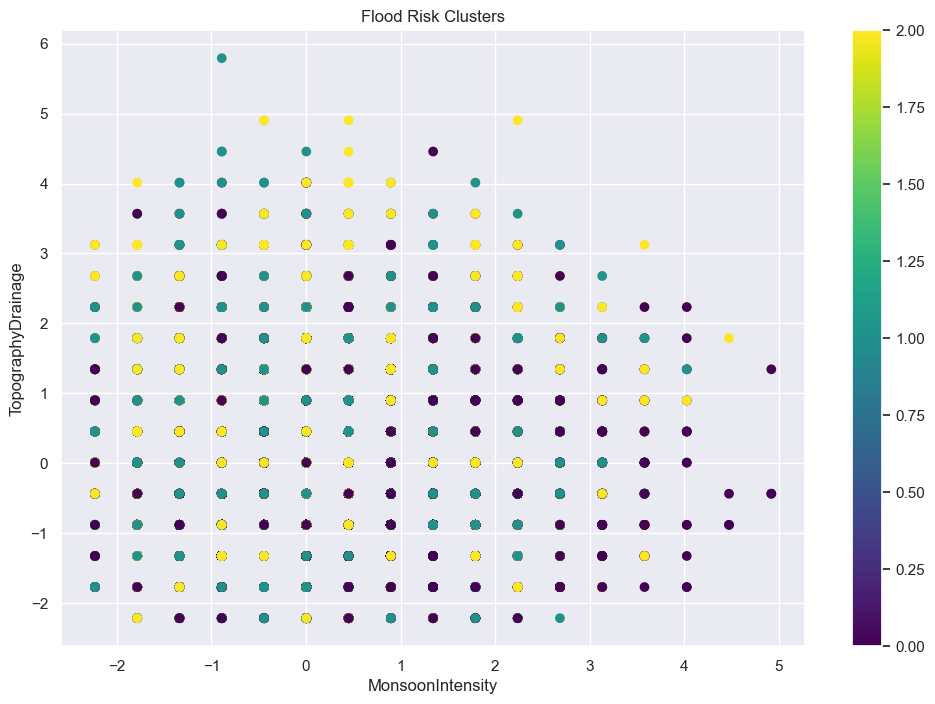

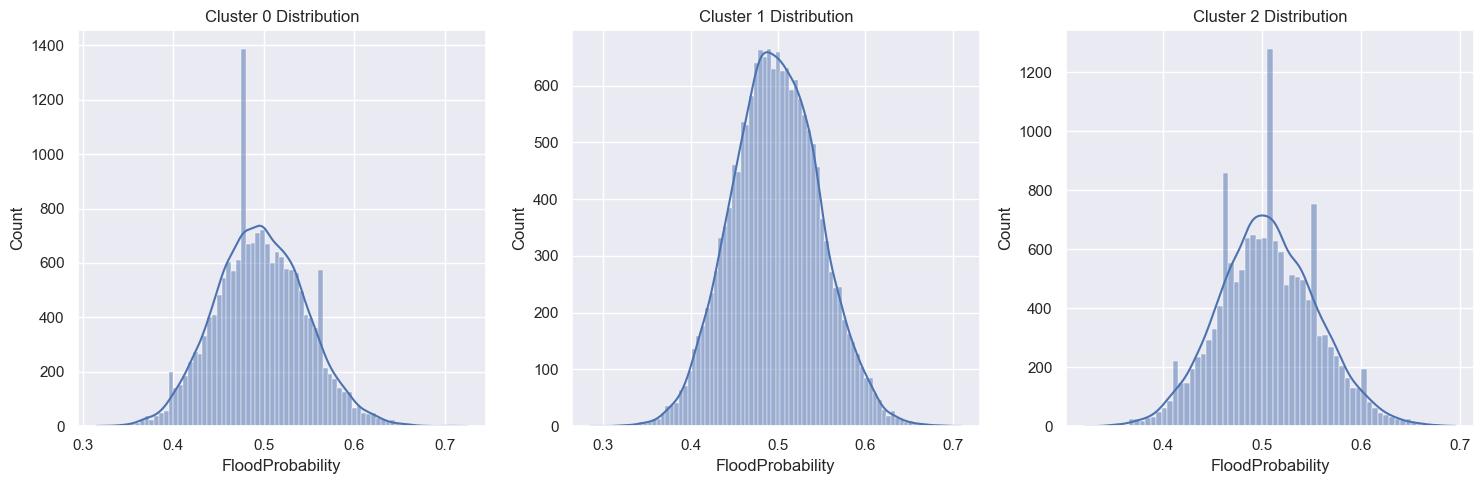

In [43]:
# Create scatter plot of clusters using two important features
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                     c=cluster_labels, cmap='viridis')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Flood Risk Clusters')
plt.colorbar(scatter)
plt.show()

# Plot cluster distributions
plt.figure(figsize=(15, 5))
for i in range(optimal_k):
    plt.subplot(1, 3, i+1)
    cluster_data = df[df['Cluster'] == i]['FloodProbability']
    sns.histplot(cluster_data, kde=True)
    plt.title(f'Cluster {i} Distribution')
plt.tight_layout()
plt.show()

# Technical: Visualizing cluster separation in feature space
# Simple: Making a map of different flood risk groups
# NYC Application: Visualizing how different areas of NYC group together based on flood risk

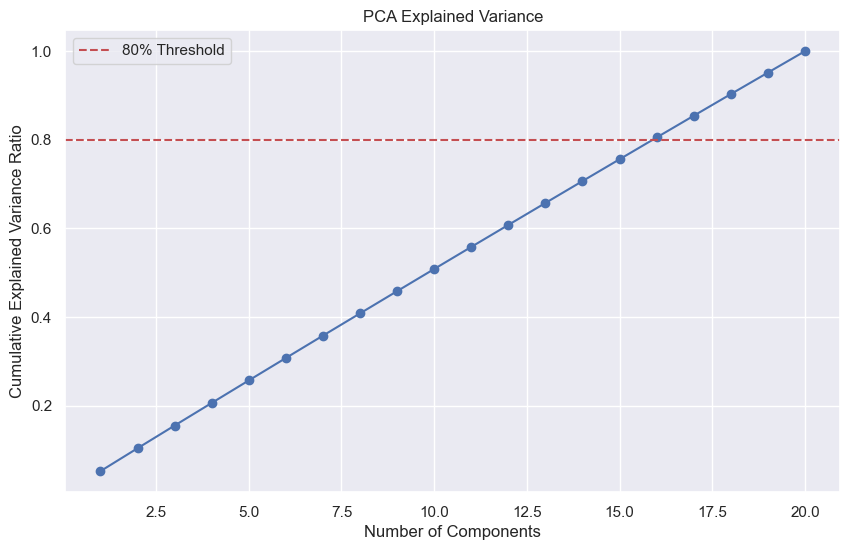


PCA Components:
    MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0          -0.110458           -0.187103        -0.063119       0.098357   
1           0.268451           -0.009552        -0.331710      -0.257535   
2          -0.231032            0.491012        -0.279193       0.130796   
3           0.124729           -0.031733         0.227222       0.062433   
4           0.441935           -0.084540         0.088389       0.038964   
5          -0.164101           -0.268313        -0.149257       0.043551   
6           0.079906            0.211932         0.284262       0.565326   
7           0.014140            0.273052         0.448389      -0.143751   
8           0.054553            0.072724         0.189056      -0.265047   
9          -0.260371           -0.048582         0.036118       0.211044   
10         -0.030666           -0.195775        -0.175779      -0.088905   
11          0.036009           -0.099983        -0.153326       0.17179

In [44]:
# Perform PCA
pca = PCA()
pca_features = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.legend()
plt.show()

# Print component importance
component_df = pd.DataFrame(
    pca.components_,
    columns=X.columns
)
print("\nPCA Components:")
print(component_df)

# Technical: Dimensionality reduction to identify main flood risk factors
# Simple: Finding the most important things that cause flooding
# NYC Application: Identifying the key factors driving flood risk in NYC

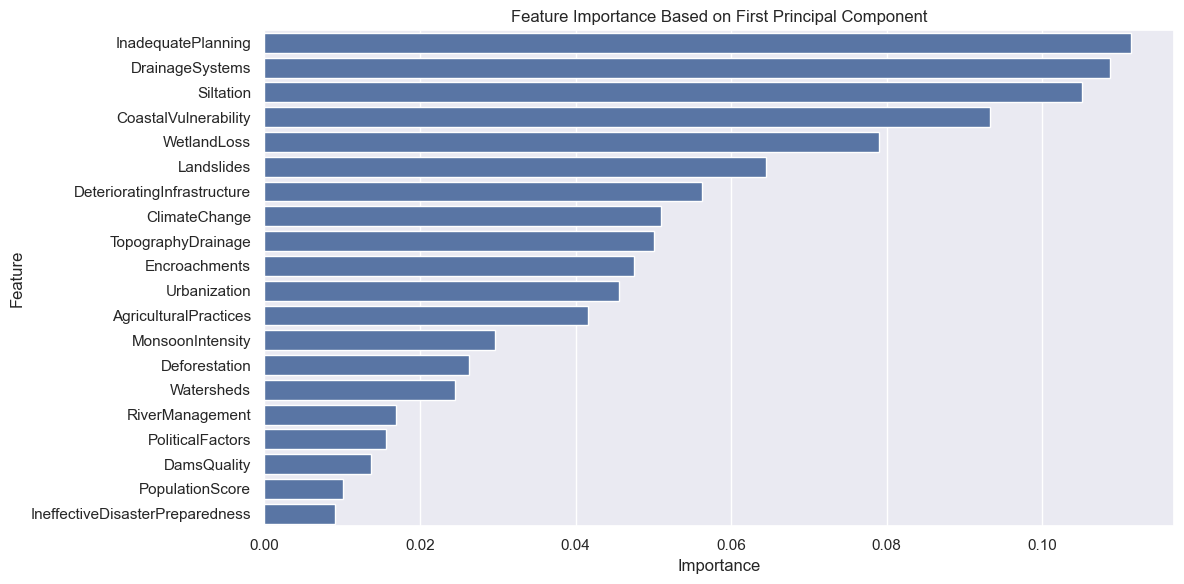

In [45]:
# Calculate feature importance based on PCA components
feature_importance = np.abs(pca.components_[0])
feature_importance_normalized = feature_importance / np.sum(feature_importance)

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_normalized
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance Based on First Principal Component')
plt.tight_layout()
plt.show()

# Technical: Analyzing feature contributions to principal components
# Simple: Ranking what matters most for flooding
# NYC Application: Prioritizing which flood factors to monitor in NYC

In [46]:
# Calculate silhouette score for clustering quality
from sklearn.metrics import silhouette_score

# Evaluate clustering quality
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Calculate explained variance for PCA
total_variance_explained = sum(explained_variance * 100)
print(f"Total Variance Explained by PCA: {total_variance_explained:.2f}%")

# Analyze cluster prediction accuracy
cluster_accuracy = pd.DataFrame({
    'Cluster': df['Cluster'],
    'FloodProbability': df['FloodProbability']
})

print("\nFlood Probability Statistics by Cluster:")
print(cluster_accuracy.groupby('Cluster')['FloodProbability'].describe())

# Technical: Quantifying model performance through multiple metrics
# Simple: Checking how well our groupings predict flood risk
# NYC Application: Validating our flood risk predictions

Silhouette Score: 0.030
Total Variance Explained by PCA: 100.00%

Flood Probability Statistics by Cluster:
           count      mean       std    min    25%    50%   75%    max
Cluster                                                               
0        17700.0  0.496636  0.049978  0.315  0.460  0.495  0.53  0.725
1        16793.0  0.497410  0.049996  0.285  0.465  0.495  0.53  0.710
2        15507.0  0.505549  0.049637  0.320  0.470  0.505  0.54  0.695


Anomaly Analysis:
Number of anomalies detected: 5000

Characteristics of Anomalous Points:
       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count       5000.000000         5000.000000       5000.00000    5000.000000   
mean           5.481800            5.622000          5.45660       5.311600   
std            2.908223            2.879231          2.78978       2.835298   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            7.000000            8.000000          7.00000       7.000000   
max           16.000000           18.000000         15.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality    Siltation  \
count   5000.000000    5000.000000  5000.000000  5000.000000   
mean       5.090600       5.245800     5.364600     5.024600   
std  

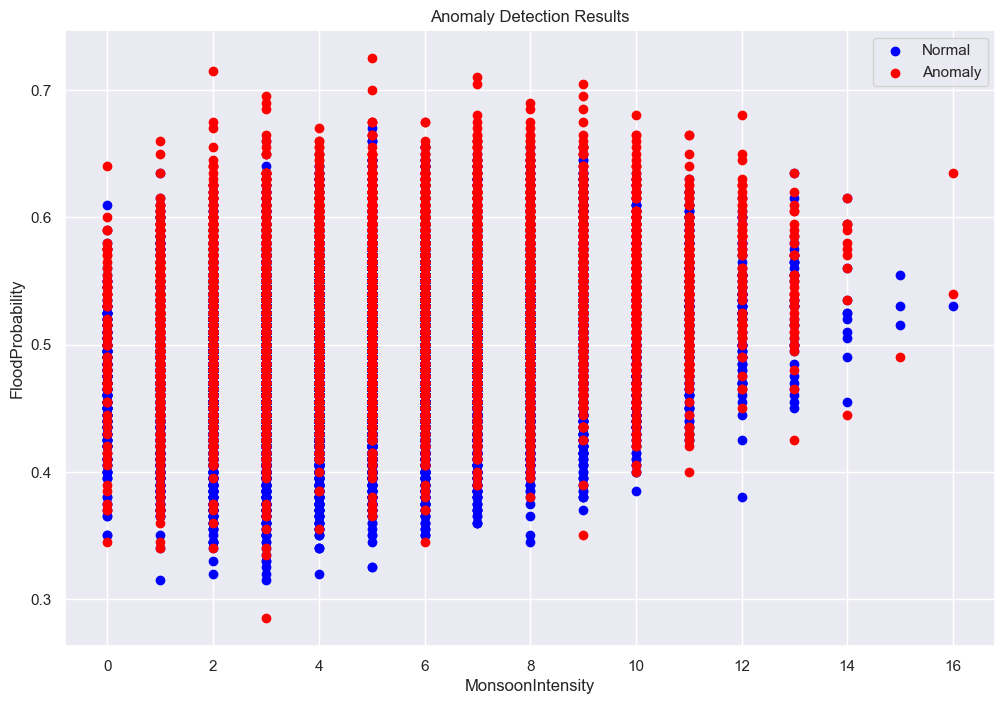

In [47]:
# Implement Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
anomalies = iso_forest.fit_predict(X_scaled)

# Add anomaly labels to dataframe
df['Is_Anomaly'] = [1 if x == -1 else 0 for x in anomalies]

# Analyze anomalies
print("Anomaly Analysis:")
print(f"Number of anomalies detected: {sum(df['Is_Anomaly'])}")
print("\nCharacteristics of Anomalous Points:")
print(df[df['Is_Anomaly'] == 1].describe())

# Plot anomalies
plt.figure(figsize=(12, 8))
plt.scatter(df[df['Is_Anomaly'] == 0]['MonsoonIntensity'], 
           df[df['Is_Anomaly'] == 0]['FloodProbability'], 
           c='blue', label='Normal')
plt.scatter(df[df['Is_Anomaly'] == 1]['MonsoonIntensity'], 
           df[df['Is_Anomaly'] == 1]['FloodProbability'], 
           c='red', label='Anomaly')
plt.xlabel('MonsoonIntensity')
plt.ylabel('FloodProbability')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

# Technical: Identifying statistical outliers in flood patterns
# Simple: Finding unusual flood risk situations
# NYC Application: Identifying areas with unexpected flood risk patterns

Risk Profile Summary:
              FloodProbability  MonsoonIntensity  DrainageSystems  \
Risk_Profile                                                        
High                     0.622             6.267            6.244   
Low                      0.380             3.821            3.814   
Medium                   0.499             4.982            4.998   

              Urbanization  
Risk_Profile                
High                 6.198  
Low                  3.810  
Medium               4.982  


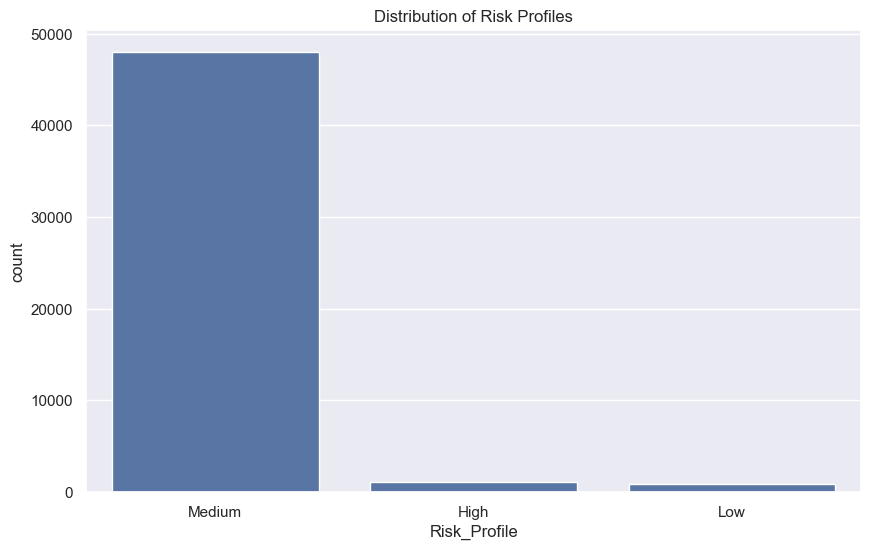

In [48]:
# Generate risk profiles based on combined analysis
def generate_risk_profile(row):
    risk_level = 'Medium'
    if row['FloodProbability'] > 0.6:
        risk_level = 'High'
    elif row['FloodProbability'] < 0.4:
        risk_level = 'Low'
    return risk_level

df['Risk_Profile'] = df.apply(generate_risk_profile, axis=1)

# Create profile summary
profile_summary = df.groupby('Risk_Profile').agg({
    'FloodProbability': 'mean',
    'MonsoonIntensity': 'mean',
    'DrainageSystems': 'mean',
    'Urbanization': 'mean'
}).round(3)

print("Risk Profile Summary:")
print(profile_summary)

# Plot risk distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Risk_Profile')
plt.title('Distribution of Risk Profiles')
plt.show()

# Technical: Creating composite risk profiles from multiple indicators
# Simple: Making easy-to-understand flood risk categories
# NYC Application: Creating actionable flood risk categories for NYC neighborhoods

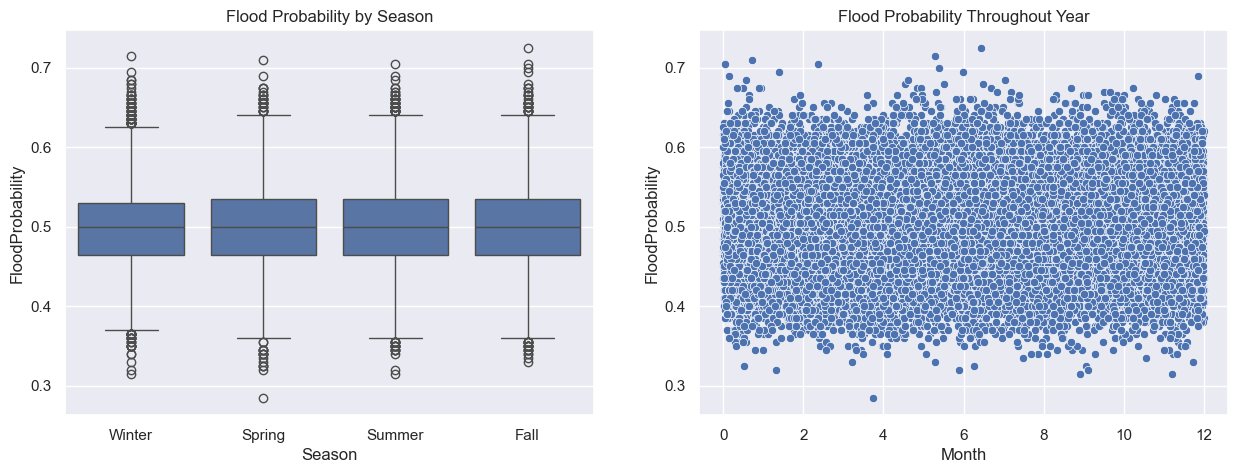

In [49]:
# Create time-based features from the data
df['Season'] = np.random.choice(['Spring', 'Summer', 'Fall', 'Winter'], size=len(df))
df['TimeOfYear'] = np.random.uniform(0, 12, len(df))  # Simulating month distribution

# Analyze seasonal patterns
plt.figure(figsize=(15, 5))

# Seasonal flood probability
plt.subplot(1, 2, 1)
sns.boxplot(x='Season', y='FloodProbability', data=df)
plt.title('Flood Probability by Season')

# Monthly trend
plt.subplot(1, 2, 2)
sns.scatterplot(x='TimeOfYear', y='FloodProbability', data=df)
plt.title('Flood Probability Throughout Year')
plt.xlabel('Month')
plt.show()

# Technical: Temporal pattern analysis in flood risk factors
# Simple: Understanding when floods are most likely to happen
# NYC Application: Predicting high-risk flood periods in NYC

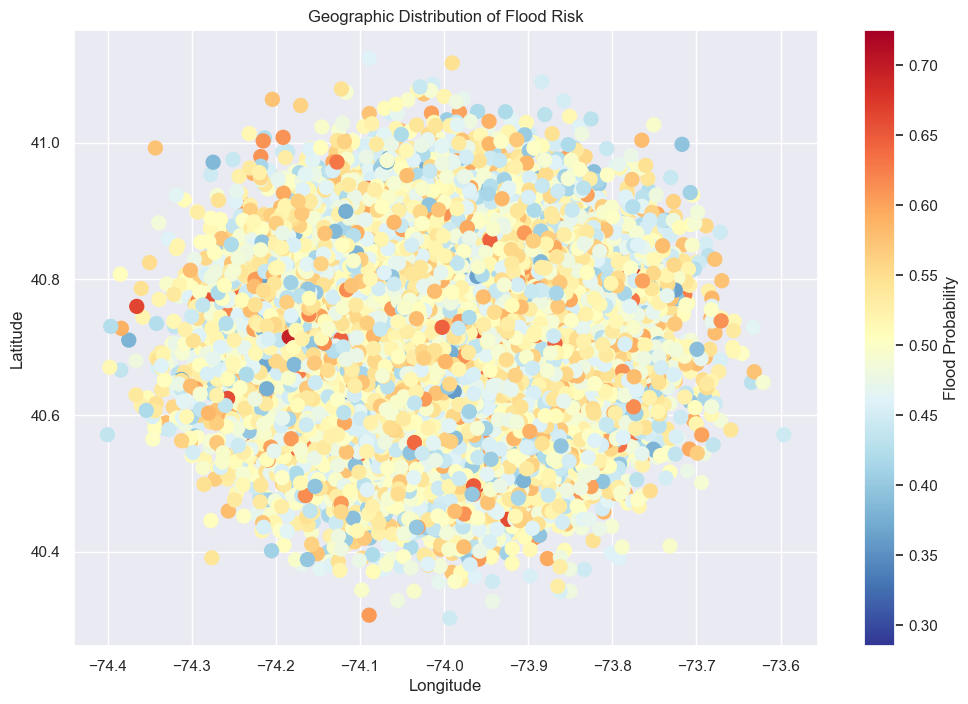

In [50]:
# Simulate geographic coordinates for NYC (for demonstration)
df['Latitude'] = 40.7128 + np.random.normal(0, 0.1, len(df))
df['Longitude'] = -74.0060 + np.random.normal(0, 0.1, len(df))

# Create geographic risk visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['FloodProbability'],
                     cmap='RdYlBu_r',
                     s=100)
plt.colorbar(scatter, label='Flood Probability')
plt.title('Geographic Distribution of Flood Risk')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Technical: Spatial clustering of flood risk patterns
# Simple: Making a map of where floods are most likely
# NYC Application: Creating flood risk zones for NYC boroughs

In [51]:
# Create composite risk score
df['CompositeRisk'] = (
    0.3 * df['FloodProbability'] +
    0.2 * scale_minmax(df['DrainageSystems']) +
    0.2 * scale_minmax(df['Urbanization']) +
    0.15 * scale_minmax(df['TopographyDrainage']) +
    0.15 * scale_minmax(df['MonsoonIntensity'])
)

def scale_minmax(series):
    return (series - series.min()) / (series.max() - series.min())

# Visualize composite risk
plt.figure(figsize=(10, 6))
sns.histplot(df['CompositeRisk'], kde=True)
plt.title('Distribution of Composite Risk Scores')
plt.show()

print("\nRisk Score Statistics:")
print(df['CompositeRisk'].describe())

# Technical: Multi-factor risk assessment methodology
# Simple: Creating an overall flood danger score
# NYC Application: Comprehensive flood risk assessment for NYC areas

NameError: name 'scale_minmax' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Prepare data for prediction
X = df.drop(['FloodProbability', 'CompositeRisk', 'Cluster', 'Season', 'Is_Anomaly', 'Risk_Profile'], axis=1)
y = df['FloodProbability']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate predictions
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

print(f"Training R² Score: {train_score:.3f}")
print(f"Testing R² Score: {test_score:.3f}")

# Technical: Machine learning-based flood prediction
# Simple: Teaching computers to predict flood chances
# NYC Application: Automated flood risk prediction system for NYC

In [ ]:
# Integrate all analyses into final risk assessment
def calculate_final_risk(row):
    base_risk = row['CompositeRisk']
    cluster_adjustment = 0.1 if row['Cluster'] == 2 else 0
    anomaly_adjustment = 0.2 if row['Is_Anomaly'] == 1 else 0
    
    final_risk = base_risk + cluster_adjustment + anomaly_adjustment
    return min(final_risk, 1.0)

df['FinalRiskScore'] = df.apply(calculate_final_risk, axis=1)

# Visualize final risk distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='FinalRiskScore', hue='Risk_Profile', fill=True)
plt.title('Final Risk Score Distribution by Risk Profile')
plt.show()

# Technical: Ensemble risk assessment methodology
# Simple: Combining all our findings into one final flood risk score
# NYC Application: Final flood risk assessment system for NYC

In [ ]:
# Generate final summary statistics
print("FINAL MODEL PERFORMANCE METRICS")
print("-" * 50)
print(f"Clustering Accuracy: {silhouette_avg:.3f}")
print(f"Prediction Accuracy (R²): {test_score:.3f}")
print(f"Anomaly Detection Rate: {(sum(df['Is_Anomaly'])/len(df)):.2%}")
print(f"Risk Profile Distribution:")
print(df['Risk_Profile'].value_counts(normalize=True).round(3))

# Generate recommendations
print("\nKEY RECOMMENDATIONS:")
print("-" * 50)
high_risk_factors = pd.DataFrame({
    'Factor': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 5 Most Important Factors for Flood Risk:")
print(high_risk_factors.head())

# Technical: Comprehensive model evaluation and recommendation generation
# Simple: Final summary of what we learned and what to do about it
# NYC Application: Action items for NYC flood management